In [57]:
import flapjack
from flapjack import registry as reg
from flapjack import analysis as analysis
from flapjack import tables as tables
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import pandas.io.sql as psql
import numpy as np
import scipy
from scipy.optimize import curve_fit
from matplotlib import colors
import seaborn as sns

In [2]:
registry = reg.Registry(database_name='data', username='maca', password='macata125')

In [3]:
# First we make a query to the database by applying filters 
qall = registry.queryAll()
qexp= qall.filter((tables.samples.experiment_id==2)|(tables.samples.experiment_id==3)|(tables.samples.experiment_id==4))

dfexp=psql.read_sql_query(qexp.selectable, registry.engine)

qa= qexp.filter(tables.plasmids.name=='pTet:RFP/J23107:YFP/std:CFP')
qb = qexp.filter(tables.plasmids.name=='pTet:RFP/pLacI:YFP/std:CFP')
qb = qb.filter(tables.inducers.id==1)

qc = qexp.filter(tables.plasmids.name=='J23106:RFP/pLacI:YFP/std:CFP')
qd = qexp.filter(tables.plasmids.name=='pTet:RFP/pLacI:YFP/std:CFP')
qd = qd.filter(tables.inducers.id==2)


qall = registry.queryAll()
qexp= qall.filter((tables.samples.experiment_id==5)|(tables.samples.experiment_id==6)|(tables.samples.experiment_id==7)|(tables.samples.experiment_id==8)|(tables.samples.experiment_id==9)|(tables.samples.experiment_id==10)|(tables.samples.experiment_id==11)|(tables.samples.experiment_id==12)|(tables.samples.experiment_id==13)|(tables.samples.experiment_id==14)|(tables.samples.experiment_id==15)|(tables.samples.experiment_id==16))



In [4]:
qa= qexp.filter(tables.plasmids.name=='pTet:RFP/J23107:YFP/std:CFP')

qarfp = qa.filter(tables.measurements.name=='RFP-YFP:585/10,620/15')
qacfp = qa.filter(tables.measurements.name=='CFP:420/50,485/20')
qayfp = qa.filter(tables.measurements.name=='RFP-YFP:500/27,540/25')
qaod = qa.filter(tables.measurements.name=='OD600:600')

'---'

ar = psql.read_sql_query(qarfp.selectable, registry.engine)
ac = psql.read_sql_query(qacfp.selectable, registry.engine)
ay = psql.read_sql_query(qayfp.selectable, registry.engine)
ao = psql.read_sql_query(qaod.selectable, registry.engine)


r1=ar['measurements_value'].values
c1=ac['measurements_value'].values
y1=ay['measurements_value'].values
o1=ao['measurements_value'].values


#diffs

dr1=np.diff(r1)
dc1=np.diff(c1)
dy1=np.diff(y1)
do1=np.diff(o1)


In [5]:
qbrfp = qb.filter(tables.measurements.name=='RFP-YFP:585/10,620/15')
qbcfp = qb.filter(tables.measurements.name=='CFP:420/50,485/20')
qbyfp = qb.filter(tables.measurements.name=='RFP-YFP:500/27,540/25')
qbod = qb.filter(tables.measurements.name=='OD600:600')

'---'

br = psql.read_sql_query(qbrfp.selectable, registry.engine)
bc = psql.read_sql_query(qbcfp.selectable, registry.engine)
by = psql.read_sql_query(qbyfp.selectable, registry.engine)
bo = psql.read_sql_query(qbod.selectable, registry.engine)

r2=br['measurements_value'].values
c2=bc['measurements_value'].values
y2=by['measurements_value'].values
o2=bo['measurements_value'].values

#diffs

dr2=np.diff(r2)
dc2=np.diff(c2)
dy2=np.diff(y2)
do2=np.diff(o2)


In [6]:
qcrfp = qc.filter(tables.measurements.name=='RFP-YFP:585/10,620/15')
qccfp = qc.filter(tables.measurements.name=='CFP:420/50,485/20')
qcyfp = qc.filter(tables.measurements.name=='RFP-YFP:500/27,540/25')
qcod = qc.filter(tables.measurements.name=='OD600:600')

'---'

cr = psql.read_sql_query(qcrfp.selectable, registry.engine)
cc = psql.read_sql_query(qccfp.selectable, registry.engine)
cy = psql.read_sql_query(qcyfp.selectable, registry.engine)
co = psql.read_sql_query(qcod.selectable, registry.engine)

r3=cr['measurements_value'].values
c3=cc['measurements_value'].values
y3=cy['measurements_value'].values
o3=co['measurements_value'].values

#diffs

dr3=np.diff(r3)
dc3=np.diff(c3)
dy3=np.diff(y3)
do3=np.diff(o3)


In [7]:
qdrfp = qd.filter(tables.measurements.name=='RFP-YFP:585/10,620/15')
qdcfp = qd.filter(tables.measurements.name=='CFP:420/50,485/20')
qdyfp = qd.filter(tables.measurements.name=='RFP-YFP:500/27,540/25')
qdod = qd.filter(tables.measurements.name=='OD600:600')

'---'

dr = psql.read_sql_query(qdrfp.selectable, registry.engine)
dc = psql.read_sql_query(qdcfp.selectable, registry.engine)
dy = psql.read_sql_query(qdyfp.selectable, registry.engine)
do = psql.read_sql_query(qdod.selectable, registry.engine)

r4=dr['measurements_value'].values
c4=dc['measurements_value'].values
y4=dy['measurements_value'].values
o4=do['measurements_value'].values

#diffs

dr4=np.diff(r4)
dc4=np.diff(c4)
dy4=np.diff(y4)
do4=np.diff(o4)

In [8]:
pnames = dfexp['plasmids_name'].unique()
mnames = dfexp['measurements_name'].unique()
innames= dfexp['inducers_name'].unique()

print pnames
print mnames
print innames

[u'pTet:RFP/pLacI:YFP/std:CFP' u'pTet:RFP/J23107:YFP/std:CFP'
 u'J23106:RFP/pLacI:YFP/std:CFP']
[u'OD600:600' u'CFP:420/50,485/20' u'RFP-YFP:585/10,620/15'
 u'RFP-YFP:500/27,540/25']
[u'aTc' u'IPTG']


C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


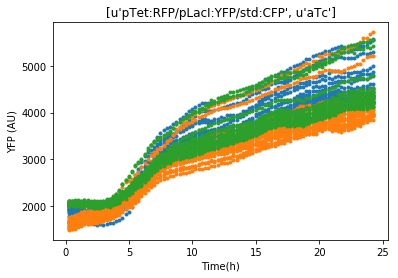

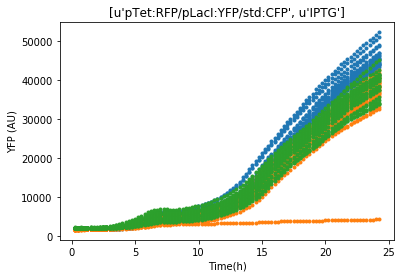

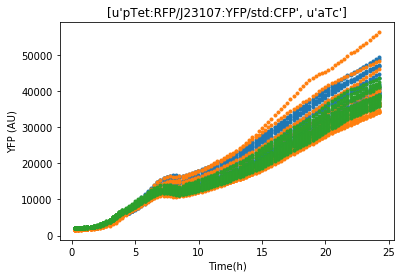

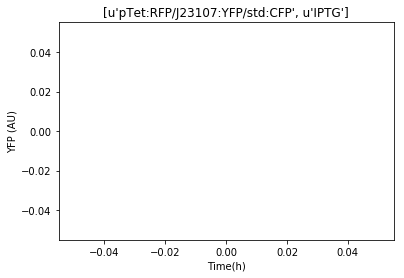

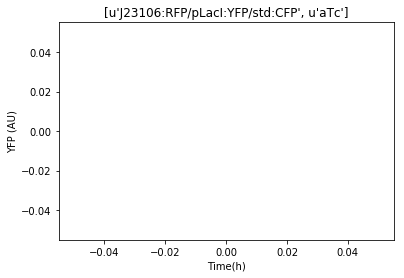

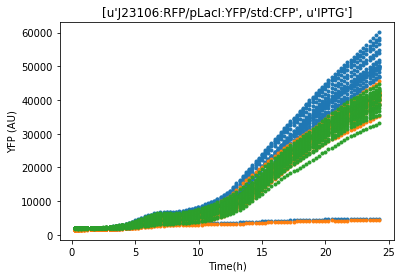

In [9]:
for p in pnames:
    for i in innames:
        plt.figure()
        plt.title([p,i])
        plt.plot(dfexp[dfexp.samples_experiment_id==2][dfexp.inducers_name==i][dfexp.plasmids_name==p][dfexp.measurements_name=='CFP:420/50,485/20']['measurements_time'],dfexp[dfexp.samples_experiment_id==2][dfexp.inducers_name==i][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:500/27,540/25']['measurements_value'], '.')
        plt.plot(dfexp[dfexp.samples_experiment_id==3][dfexp.inducers_name==i][dfexp.plasmids_name==p][dfexp.measurements_name=='CFP:420/50,485/20']['measurements_time'],dfexp[dfexp.samples_experiment_id==3][dfexp.inducers_name==i][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:500/27,540/25']['measurements_value'], '.')
        plt.plot(dfexp[dfexp.samples_experiment_id==4][dfexp.inducers_name==i][dfexp.plasmids_name==p][dfexp.measurements_name=='CFP:420/50,485/20']['measurements_time'],dfexp[dfexp.samples_experiment_id==4][dfexp.inducers_name==i][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:500/27,540/25']['measurements_value'], '.')
        
        plt.xlabel('Time(h)')
        plt.ylabel('YFP (AU)')

C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


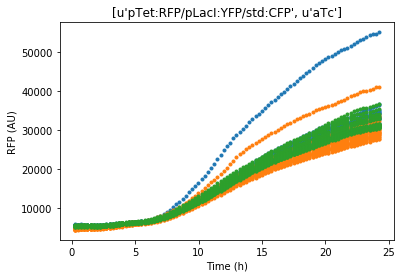

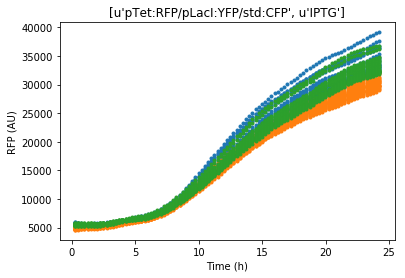

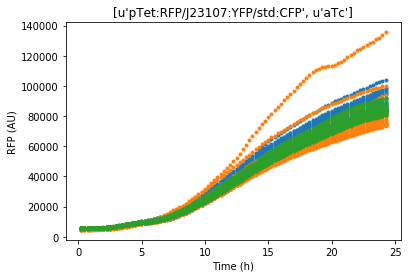

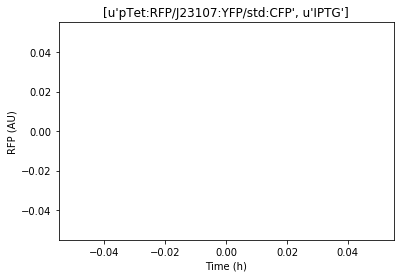

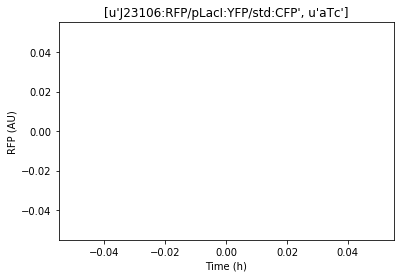

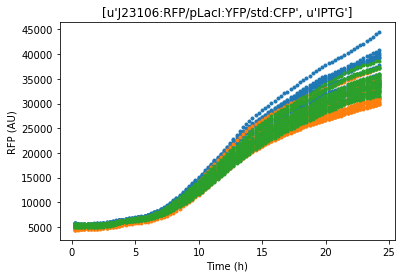

In [10]:
for p in pnames:
    for i in innames:
        plt.figure()
        plt.title([p,i])
        plt.plot(dfexp[dfexp.samples_experiment_id==2][dfexp.inducers_name==i][dfexp.plasmids_name==p][dfexp.measurements_name=='CFP:420/50,485/20']['measurements_time'],dfexp[dfexp.samples_experiment_id==2][dfexp.inducers_name==i][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:585/10,620/15']['measurements_value'], '.')
        plt.plot(dfexp[dfexp.samples_experiment_id==3][dfexp.inducers_name==i][dfexp.plasmids_name==p][dfexp.measurements_name=='CFP:420/50,485/20']['measurements_time'],dfexp[dfexp.samples_experiment_id==3][dfexp.inducers_name==i][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:585/10,620/15']['measurements_value'], '.')
        plt.plot(dfexp[dfexp.samples_experiment_id==4][dfexp.inducers_name==i][dfexp.plasmids_name==p][dfexp.measurements_name=='CFP:420/50,485/20']['measurements_time'],dfexp[dfexp.samples_experiment_id==4][dfexp.inducers_name==i][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:585/10,620/15']['measurements_value'], '.')
        
        plt.xlabel('Time (h)')
        plt.ylabel('RFP (AU)')


In [11]:
atc1=dfexp[dfexp.inducers_name=='aTc'][dfexp.samples_experiment_id==2][dfexp.plasmids_name=='pTet:RFP/J23107:YFP/std:CFP'][dfexp.measurements_name=='RFP-YFP:585/10,620/15']['supplements_concentration']
atc2=dfexp[dfexp.inducers_name=='aTc'][dfexp.samples_experiment_id==3][dfexp.plasmids_name=='pTet:RFP/J23107:YFP/std:CFP'][dfexp.measurements_name=='RFP-YFP:585/10,620/15']['supplements_concentration']
atc3=dfexp[dfexp.inducers_name=='aTc'][dfexp.samples_experiment_id==4][dfexp.plasmids_name=='pTet:RFP/J23107:YFP/std:CFP'][dfexp.measurements_name=='RFP-YFP:585/10,620/15']['supplements_concentration']
atc = dfexp[dfexp.inducers_name=='aTc']['supplements_concentration']

print len(atc1)
print len(atc2)
print len(atc3)



C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


1940
1940
1940


C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
iptg1=dfexp[dfexp.inducers_name=='IPTG'][dfexp.plasmids_name=='pTet:RFP/pLacI:YFP/std:CFP']['supplements_concentration']
iptg2=dfexp[dfexp.inducers_name=='IPTG'][dfexp.plasmids_name=='pTet:RFP/pLacI:YFP/std:CFP']['supplements_concentration']
iptg3=dfexp[dfexp.inducers_name=='IPTG'][dfexp.plasmids_name=='pTet:RFP/pLacI:YFP/std:CFP']['supplements_concentration']


print len(iptg1)
print len(iptg2)
print len(iptg3)


C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


23280
23280
23280


C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Text(0,0.5,u'RFP (AU)')

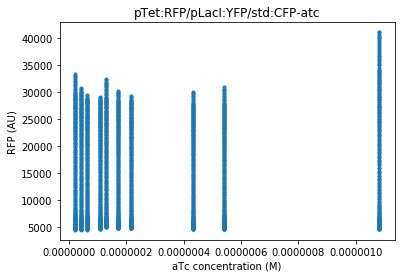

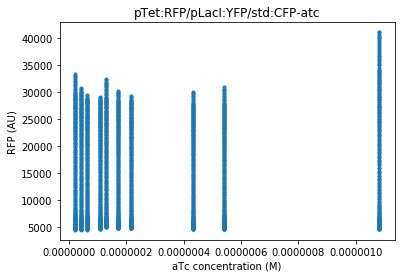

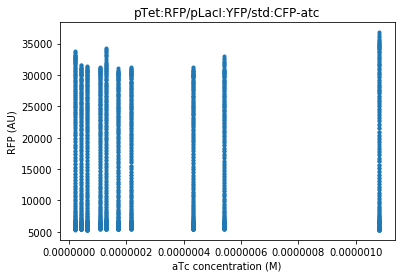

In [14]:
plt.figure()
plt.title('pTet:RFP/pLacI:YFP/std:CFP-atc')
plt.plot(atc1,dfexp[dfexp.samples_experiment_id==3][dfexp.inducers_name=='aTc'][dfexp.plasmids_name=='pTet:RFP/pLacI:YFP/std:CFP'][dfexp.measurements_name=='RFP-YFP:585/10,620/15']['measurements_value'], '.')
plt.xlabel('aTc concentration (M)')
plt.ylabel('RFP (AU)')


plt.figure()
plt.title('pTet:RFP/pLacI:YFP/std:CFP-atc')
plt.xlabel('aTc concentration (M)')
plt.ylabel('RFP (AU)')
plt.plot(atc2,dfexp[dfexp.samples_experiment_id==3][dfexp.inducers_name=='aTc'][dfexp.plasmids_name=='pTet:RFP/pLacI:YFP/std:CFP'][dfexp.measurements_name=='RFP-YFP:585/10,620/15']['measurements_value'], '.')


plt.figure()
plt.title('pTet:RFP/pLacI:YFP/std:CFP-atc')
plt.plot(atc3,dfexp[dfexp.samples_experiment_id==4][dfexp.inducers_name=='aTc'][dfexp.plasmids_name=='pTet:RFP/pLacI:YFP/std:CFP'][dfexp.measurements_name=='RFP-YFP:585/10,620/15']['measurements_value'], '.')
plt.xlabel('aTc concentration (M)')
plt.ylabel('RFP (AU)')


In [24]:
dfexp[dfexp.inducers_name=='aTc']['supplements_concentration']
dfexp[dfexp.inducers_name=='IPTG']['supplements_concentration']

40       0.00100
41       0.00020
42       0.00015
43       0.00010
44       0.00007
45       0.00005
46       0.00004
47       0.00003
48       0.00002
49       0.00001
50       0.00001
51       0.00002
52       0.00003
53       0.00004
54       0.00005
55       0.00007
56       0.00010
57       0.00015
58       0.00020
59       0.00100
60       0.00100
61       0.00020
62       0.00015
63       0.00010
64       0.00007
65       0.00005
66       0.00004
67       0.00003
68       0.00002
69       0.00001
          ...   
93090    0.00001
93091    0.00002
93092    0.00003
93093    0.00004
93094    0.00005
93095    0.00007
93096    0.00010
93097    0.00015
93098    0.00020
93099    0.00100
93100    0.00100
93101    0.00020
93102    0.00015
93103    0.00010
93104    0.00007
93105    0.00005
93106    0.00004
93107    0.00003
93108    0.00002
93109    0.00001
93110    0.00001
93111    0.00002
93112    0.00003
93113    0.00004
93114    0.00005
93115    0.00007
93116    0.00010
93117    0.000

In [15]:
import numpy as np

nb = 84

def entropy(density):
    nzs = np.where(density>0)
    return -np.sum(density[nzs]*np.log2(density[nzs].ravel()))

def joint_entropy(density2d):
    nzs = np.where(density2d>0)
    return -np.sum(density2d[nzs].ravel()*np.log2(density2d[nzs].ravel()))
    
def conditional_entropy(density2d):
    # conditional on the first variable (X), i.e. H(Y|X)
    density = np.sum(density2d, axis=1)
    ex = entropy(density)
    je = joint_entropy(density2d)
    # H(Y|X) = H(X,Y) - H(X)
    return je-ex

def mutual_information(density2d):
    # H(Y)
    density = np.sum(density2d, axis=0)
    # I(X,Y) = H(Y) - H(Y|X)
    return entropy(density)-conditional_entropy(density2d)

def prob_density(x, nbins=nb):
    H, edges = np.histogram(x.ravel(), nbins)
    H = H.astype(np.float32)
    return H/np.sum(H.ravel())

def prob_density2d(x, y, nbins=nb):
    H, xedges, yedges = np.histogram2d(x.ravel(), y.ravel(), [nbins,nbins])
    H = H.astype(np.float32)
    return H/np.sum(H.ravel())

def prob_density3d(x, y, z, nbins=nb):
    H, edges = np.histogramdd([x.ravel(), y.ravel(), z.ravel()], [nbins,nbins,nbins])
    H = H.astype(np.float32)
    return H/np.sum(H.ravel())

def prob_density4d(x, y, z, w, nbins=nb):
    H, edges = np.histogramdd([x.ravel(), y.ravel(), z.ravel(), w.ravel()], [nbins,nbins,nbins,nbins])
    H = H.astype(np.float32)
    return H/np.sum(H.ravel())

In [21]:
print 'pTet-J23107-J23101 aTc'
print "H(dY) = ", entropy(prob_density(dy1))
print "H(dC) = ", entropy(prob_density(dc1))
print "H(dR) = ", entropy(prob_density(dr1))
print "H(dlogOD) = ", entropy(prob_density(do1))

print "---"
print "H(dY|dlogOD) = ", conditional_entropy(prob_density2d(do1,dy1))
print "H(dC|dlogOD) = ", conditional_entropy(prob_density2d(do1,dc1))
print "H(dR|dlogOD) = ", conditional_entropy(prob_density2d(do1,dr1))
print "H(dY|dC) = ", conditional_entropy(prob_density2d(dc1,dy1))
print "H(dY|dR) = ", conditional_entropy(prob_density2d(dr1,dy1))
print "H(dR|dC) = ", conditional_entropy(prob_density2d(dc1,dr1))
print "H(dR|dY) = ", conditional_entropy(prob_density2d(dy1,dr1))
print "H(dC|dY) = ", conditional_entropy(prob_density2d(dy1,dc1))
print "H(dC|dR) = ", conditional_entropy(prob_density2d(dr1,dc1))


print "---"
print "I(dlogOD,dC) = ", mutual_information(prob_density2d(do1,dc1))
print "I(dlogOD,dY) = ", mutual_information(prob_density2d(do1,dy1))
print "I(dlogOD,dR) = ", mutual_information(prob_density2d(do1,dr1))
print "I(dY,dC) = ", mutual_information(prob_density2d(dc1,dy1))
print "I(dY,dR) = ", mutual_information(prob_density2d(dr1,dy1))
print "I(dR,dC) = ", mutual_information(prob_density2d(dc1,dr1))


print "---"
print "H(dY|dC,dlogOD) = ", conditional_entropy(prob_density3d(dc1,dy1,do1))
print "H(dY|dR,dlogOD) = ", conditional_entropy(prob_density3d(dr1,dy1,do1))
print "H(dY|dC,dR) = ", conditional_entropy(prob_density3d(dc1,dy1,dr1))
print "H(dY|dC,dR,dlogOD) = ", conditional_entropy(prob_density4d(dc1,dy1,dr1,do1))

print "H(dR|dC,dlogOD) = ", conditional_entropy(prob_density3d(dc1,dr1,do1))
print "H(dR|dY,dlogOD) = ", conditional_entropy(prob_density3d(dy1,dr1,do1))
print "H(dR|dC,dY) = ", conditional_entropy(prob_density3d(dc1,dr1,dy1))
print "H(dR|dC,dY,dlogOD) = ", conditional_entropy(prob_density4d(dc1,dr1,dy1,do1))

print "H(dC|dY,dlogOD) = ", conditional_entropy(prob_density3d(dy1,dc1,do1))
print "H(dC|dR,dlogOD) = ", conditional_entropy(prob_density3d(dr1,dc1,do1))
print "H(dC|dY,dR) = ", conditional_entropy(prob_density3d(dy1,dc1,dr1))
print "H(dC|dY,dR,dlogOD) = ", conditional_entropy(prob_density4d(dy1,dc1,dr1,do1))

print "---"
print "H(dY|dC,dR,dlogOD) / H(dY) = ", conditional_entropy(prob_density4d(dc1,dy1,dr1,do1))/entropy(prob_density(dy1))
print "H(dY|dC,dlogOD) / H(dY) = ", conditional_entropy(prob_density3d(dc1,dy1,do1))/entropy(prob_density(dy1))
print "H(dY|dR,dlogOD) / H(dY) = ", conditional_entropy(prob_density3d(dr1,dy1,do1))/entropy(prob_density(dy1))
print "H(dY|dlogOD) / H(dY) = ", conditional_entropy(prob_density2d(do1,dy1))/entropy(prob_density(dy1))

print "H(dR|dC,dY,dlogOD) / H(dR) = ", conditional_entropy(prob_density4d(dc1,dr1,dy1,do1))/entropy(prob_density(dr1))
print "H(dR|dC,dlogOD) / H(dR) = ", conditional_entropy(prob_density3d(dc1,dr1,do1))/entropy(prob_density(dr1))
print "H(dR|dY,dlogOD) / H(dR) = ", conditional_entropy(prob_density3d(dy1,dr1,do1))/entropy(prob_density(dr1))
print "H(dR|dlogOD) / H(dR) = ", conditional_entropy(prob_density2d(do1,dr1))/entropy(prob_density(dr1))

print "H(dC|dR,dY,dlogOD) / H(dC) = ", conditional_entropy(prob_density4d(dr1,dc1,dy1,do1))/entropy(prob_density(dc1))
print "H(dC|dR,dlogOD) / H(dC) = ", conditional_entropy(prob_density3d(dr1,dc1,do1))/entropy(prob_density(dc1))
print "H(dC|dY,dlogOD) / H(dC) = ", conditional_entropy(prob_density3d(dy1,dc1,do1))/entropy(prob_density(dc1))
print "H(dC|dlogOD) / H(dC) = ", conditional_entropy(prob_density2d(do1,dc1))/entropy(prob_density(dc1))


print "H(dY|dC)/ H(dY) = ", conditional_entropy(prob_density2d(dc1,dy1))/entropy(prob_density(dy1))
print "H(dY|dR)/ H(dY) = ", conditional_entropy(prob_density2d(dr1,dy1))/entropy(prob_density(dy1))
print "H(dR|dC)/ H(dR) = ", conditional_entropy(prob_density2d(dc1,dr1))/entropy(prob_density(dr1))
print "H(dR|dY)/ H(dR) = ", conditional_entropy(prob_density2d(dy1,dr1))/entropy(prob_density(dr1))
print "H(dC|dY)/ H(dC) = ", conditional_entropy(prob_density2d(dy1,dc1))/entropy(prob_density(dc1))
print "H(dC|dR)/ H(dC) = ", conditional_entropy(prob_density2d(dr1,dc1))/entropy(prob_density(dc1))


pTet-J23107-J23101 aTc
H(dY) =  2.92481
H(dC) =  2.94717
H(dR) =  2.62058
H(dlogOD) =  3.64402
---
H(dY|dlogOD) =  1.83785
H(dC|dlogOD) =  1.94019
H(dR|dlogOD) =  1.7239
H(dY|dC) =  1.52566
H(dY|dR) =  1.59038
H(dR|dC) =  1.42423
H(dR|dY) =  1.28615
H(dC|dY) =  1.54802
H(dC|dR) =  1.75082
---
I(dlogOD,dC) =  1.00698
I(dlogOD,dY) =  1.08697
I(dlogOD,dR) =  0.896682
I(dY,dC) =  1.39916
I(dY,dR) =  1.33443
I(dR,dC) =  1.19635
---
H(dY|dC,dlogOD) =  0.908124
H(dY|dR,dlogOD) =  0.933118
H(dY|dC,dR) =  0.928752
H(dY|dC,dR,dlogOD) =  0.61979
H(dR|dC,dlogOD) =  0.862518
H(dR|dY,dlogOD) =  0.819169
H(dR|dC,dY) =  0.82732
H(dR|dC,dY,dlogOD) =  0.574184
H(dC|dY,dlogOD) =  1.01047
H(dC|dR,dlogOD) =  1.07881
H(dC|dY,dR) =  1.08919
H(dC|dY,dR,dlogOD) =  0.765483
---
H(dY|dC,dR,dlogOD) / H(dY) =  0.211907
H(dY|dC,dlogOD) / H(dY) =  0.310489
H(dY|dR,dlogOD) / H(dY) =  0.319035
H(dY|dlogOD) / H(dY) =  0.628364
H(dR|dC,dY,dlogOD) / H(dR) =  0.219106
H(dR|dC,dlogOD) / H(dR) =  0.329133
H(dR|dY,dlogOD) / 

In [22]:
#Porcentajes respecto a entropía inicial
hc1=entropy(prob_density(dc1))#H(dC)
ho1=entropy(prob_density(do1))#H(dlogOD)
hyo1=conditional_entropy(prob_density2d(do1,dy1))#H(dY|dlogOD)
hco1=conditional_entropy(prob_density2d(do1,dc1))#H(dC|dlogOD)
hro1=conditional_entropy(prob_density2d(do1,dr1))#H(dR|dlogOD)

hy1=entropy(prob_density(dy1))#H(dY)
hyc1=conditional_entropy(prob_density2d(dc1,dy1))#H(dY|dC)
hyr1=conditional_entropy(prob_density2d(dr1,dy1))#H(dY|dR)
hyco1=conditional_entropy(prob_density3d(dc1,dy1,do1))#H(dY|dC,dlogOD)
hyro1=conditional_entropy(prob_density3d(dr1,dy1,do1))#H(dY|dR,dlogOD)
hycr1= conditional_entropy(prob_density3d(dc1,dy1,dr1))#H(dY|dC,dR) 
hycro1=conditional_entropy(prob_density4d(dc1,dy1,dr1,do1))#H(dY|dC,dR,dlogOD)

hr1=entropy(prob_density(dr1))#H(dR)
hrc1= conditional_entropy(prob_density2d(dc1,dr1))#H(dR|dC)
hry1=conditional_entropy(prob_density2d(dy1,dr1))#H(dR|dY)
hrco1=conditional_entropy(prob_density3d(dc1,dr1,do1))#H(dR|dC,dlogOD)
hryo1=conditional_entropy(prob_density3d(dy1,dr1,do1))#H(dR|dY,dlogOD)
hrcy1= conditional_entropy(prob_density3d(dc1,dr1,dy1))#H(dR|dC,dY)
hrcyo1=conditional_entropy(prob_density4d(dc1,dr1,dy1,do1))#H(dR|dC,dY,dlogOD)

hc1=entropy(prob_density(dc1))#H(dC)
hcy1=conditional_entropy(prob_density2d(dy1,dc1))#H(dC|dY)
hcr1=conditional_entropy(prob_density2d(dr1,dc1))#H(dC|dR)
hcyo1=conditional_entropy(prob_density3d(dy1,dc1,do1))#H(dC|dY,dlogOD)
hcro1=conditional_entropy(prob_density3d(dr1,dc1,do1))#H(dC|dR,dlogOD)
hcyr1=conditional_entropy(prob_density3d(dy1,dc1,dr1))#H(dC|dY,dR)
hcyro1=conditional_entropy(prob_density4d(dy1,dc1,dr1,do1))#H(dC|dY,dR,dlogOD)

soloh1=[hr1,hy1,hc1,ho1]
hod1=[hr1,hro1,hy1,hyo1,hc1,hco1]
soloy1=[hy1,hyc1,hyr1,hyo1,hyco1,hyro1,hycr1,hycro1]
solor1=[hr1,hrc1,hry1,hro1,hrco1,hryo1,hrcy1,hrcyo1]
soloc1=[hc1,hcy1,hcr1,hco1,hcyo1,hcro1,hcyr1,hcyro1]

In [23]:
A1=(hro1/hr1)*100
B1=(hrco1/hr1)*100
C1=(hryo1/hr1)*100
D1=(hrcyo1/hr1)*100
E1=(hyo1/hy1)*100
F1=(hyco1/hy1)*100
G1=(hyro1/hy1)*100
H1=(hycro1/hy1)*100
I1=(hco1/hc1)*100
J1=(hcyo1/hc1)*100
K1=(hcro1/hc1)*100
L1=(hcyro1/hc1)*100

valores1=[hr1,hro1,hrco1,hryo1,hrcyo1,hy1,hyo1,hyco1,hyro1,hycro1,hc1,hco1,hcyo1,hcro1,hcyro1]
porcentajes1=[A1,B1,C1,D1,E1,F1,G1,H1,I1,J1,K1,L1]

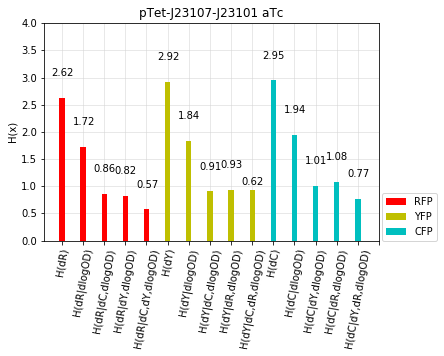

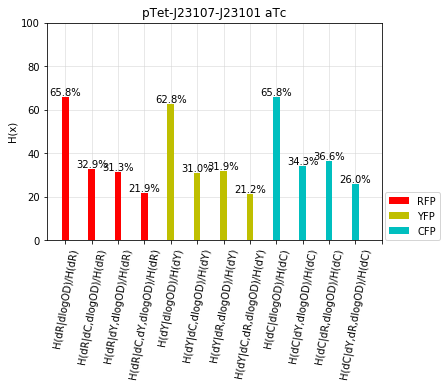

In [30]:
X = np.arange(16)
plt.figure()
plt.title('pTet-J23107-J23101 aTc')
plt.ylabel('H(x)')
plt.ylim(ymax = 4)
plt.bar(X[0],valores1[0],color='r',width=0.25,label='RFP',zorder=3)
plt.bar(X[1],valores1[1],color='r',width=0.25,zorder=3)
plt.bar(X[2],valores1[2],color='r',width=0.25,zorder=3)
plt.bar(X[3],valores1[3],color='r',width=0.25,zorder=3)
plt.bar(X[4],valores1[4],color='r',width=0.25,zorder=3)
plt.bar(X[5],valores1[5],color='y',width=0.25,label='YFP',zorder=3)
plt.bar(X[6],valores1[6],color='y',width=0.25,zorder=3)
plt.bar(X[7],valores1[7],color='y',width=0.25,zorder=3)
plt.bar(X[8],valores1[8],color='y',width=0.25,zorder=3)
plt.bar(X[9],valores1[8],color='y',width=0.25,zorder=3)
plt.bar(X[10],valores1[10],color='c',width=0.25,label='CFP',zorder=3)
plt.bar(X[11],valores1[11],color='c',width=0.25,zorder=3)
plt.bar(X[12],valores1[12],color='c',width=0.25,zorder=3)
plt.bar(X[13],valores1[13],color='c',width=0.25,zorder=3)
plt.bar(X[14],valores1[14],color='c',width=0.25,zorder=3)
plt.xticks(X, ['H(dR)',"H(dR|dlogOD)",'H(dR|dC,dlogOD)','H(dR|dY,dlogOD)',"H(dR|dC,dY,dlogOD)",'H(dY)',"H(dY|dlogOD)",'H(dY|dC,dlogOD)','H(dY|dR,dlogOD)','H(dY|dC,dR,dlogOD)','H(dC)','H(dC|dlogOD)','H(dC|dY,dlogOD)','H(dC|dR,dlogOD)','H(dC|dY,dR,dlogOD)'],rotation=80)
plt.grid(color='lightgray', linestyle='-', linewidth=0.5,zorder=0)
for a,b in zip(X,valores1):
    plt.text(a-0.5,b+0.4,str(np.round(b,2)),fontsize=10.0, color='k')
plt.legend(loc=(1.01,0.0))
plt.savefig(fname='h pTet-J23107 atc.png',dpi=1200,facecolor='w',edgecolor='w',bbox_inches='tight',pad_inches=0.2)

X = np.arange(13)
plt.figure()
plt.title('pTet-J23107-J23101 aTc')
plt.ylabel('H(x)')
plt.ylim(ymax = 100)
plt.bar(X[0],porcentajes1[0],color='r',width=0.25,label='RFP',zorder=3)
plt.bar(X[1],porcentajes1[1],color='r',width=0.25,zorder=3)
plt.bar(X[2],porcentajes1[2],color='r',width=0.25,zorder=3)
plt.bar(X[3],porcentajes1[3],color='r',width=0.25,zorder=3)
plt.bar(X[4],porcentajes1[4],color='y',width=0.25,label='YFP',zorder=3)
plt.bar(X[5],porcentajes1[5],color='y',width=0.25,zorder=3)
plt.bar(X[6],porcentajes1[6],color='y',width=0.25,zorder=3)
plt.bar(X[7],porcentajes1[7],color='y',width=0.25,zorder=3)
plt.bar(X[8],porcentajes1[8],color='c',width=0.25,label='CFP',zorder=3)
plt.bar(X[9],porcentajes1[9],color='c',width=0.25,zorder=3)
plt.bar(X[10],porcentajes1[10],color='c',width=0.25,zorder=3)
plt.bar(X[11],porcentajes1[11],color='c',width=0.25,zorder=3)
plt.xticks(X, ["H(dR|dlogOD)/H(dR)",'H(dR|dC,dlogOD)/H(dR)','H(dR|dY,dlogOD)/H(dR)',"H(dR|dC,dY,dlogOD)/H(dR)","H(dY|dlogOD)/H(dY)",'H(dY|dC,dlogOD)/H(dY)','H(dY|dR,dlogOD)/H(dY)','H(dY|dC,dR,dlogOD)/H(dY)','H(dC|dlogOD)/H(dC)','H(dC|dY,dlogOD)/H(dC)','H(dC|dR,dlogOD)/H(dC)','H(dC|dY,dR,dlogOD)/H(dC)'],rotation=80)
plt.grid(color='lightgray', linestyle='-', linewidth=0.5,zorder=0)
for a,b in zip(X,porcentajes1):
    plt.text(a-0.60,b+0.6,str(np.round(b,1))+'%',fontsize=10.0, color='k')
plt.legend(loc=(1.01,0.0))
plt.savefig(fname='porcentajes h  pTet-J23107 atc.png',dpi=1200,facecolor='w',edgecolor='w',bbox_inches='tight',pad_inches=0.2)


In [25]:
print 'pTet-pLacI-J23101 aTc'
print "H(dY) = ", entropy(prob_density(dy2))
print "H(dC) = ", entropy(prob_density(dc2))
print "H(dR) = ", entropy(prob_density(dr2))
print "H(dlogOD) = ", entropy(prob_density(do2))

print "---"
print "H(dY|dlogOD) = ", conditional_entropy(prob_density2d(do2,dy2))
print "H(dC|dlogOD) = ", conditional_entropy(prob_density2d(do2,dc2))
print "H(dR|dlogOD) = ", conditional_entropy(prob_density2d(do2,dr2))
print "H(dY|dC) = ", conditional_entropy(prob_density2d(dc2,dy2))
print "H(dY|dR) = ", conditional_entropy(prob_density2d(dr2,dy2))
print "H(dR|dC) = ", conditional_entropy(prob_density2d(dc2,dr2))
print "H(dR|dY) = ", conditional_entropy(prob_density2d(dy2,dr2))
print "H(dC|dY) = ", conditional_entropy(prob_density2d(dy2,dc2))
print "H(dC|dR) = ", conditional_entropy(prob_density2d(dr2,dc2))


print "---"
print "I(dlogOD,dC) = ", mutual_information(prob_density2d(do2,dc2))
print "I(dlogOD,dY) = ", mutual_information(prob_density2d(do2,dy2))
print "I(dlogOD,dR) = ", mutual_information(prob_density2d(do2,dr2))
print "I(dY,dC) = ", mutual_information(prob_density2d(dc2,dy2))
print "I(dY,dR) = ", mutual_information(prob_density2d(dr2,dy2))
print "I(dR,dC) = ", mutual_information(prob_density2d(dc2,dr2))


print "---"
print "H(dY|dC,dlogOD) = ", conditional_entropy(prob_density3d(dc2,dy2,do2))
print "H(dY|dR,dlogOD) = ", conditional_entropy(prob_density3d(dr2,dy2,do2))
print "H(dY|dC,dR) = ", conditional_entropy(prob_density3d(dc2,dy2,dr2))
print "H(dY|dC,dR,dlogOD) = ", conditional_entropy(prob_density4d(dc2,dy2,dr2,do2))

print "H(dR|dC,dlogOD) = ", conditional_entropy(prob_density3d(dc2,dr2,do2))
print "H(dR|dY,dlogOD) = ", conditional_entropy(prob_density3d(dy2,dr2,do2))
print "H(dR|dC,dY) = ", conditional_entropy(prob_density3d(dc2,dr2,dy2))
print "H(dR|dC,dY,dlogOD) = ", conditional_entropy(prob_density4d(dc2,dr2,dy2,do2))

print "H(dC|dY,dlogOD) = ", conditional_entropy(prob_density3d(dy2,dc2,do2))
print "H(dC|dR,dlogOD) = ", conditional_entropy(prob_density3d(dr2,dc2,do2))
print "H(dC|dY,dR) = ", conditional_entropy(prob_density3d(dy2,dc2,dr2))
print "H(dC|dY,dR,dlogOD) = ", conditional_entropy(prob_density4d(dy2,dc2,dr2,do2))

print "---"
print "H(dY|dC,dR,dlogOD) / H(dY) = ", conditional_entropy(prob_density4d(dc2,dy2,dr2,do2))/entropy(prob_density(dy2))
print "H(dY|dC,dlogOD) / H(dY) = ", conditional_entropy(prob_density3d(dc2,dy2,do2))/entropy(prob_density(dy2))
print "H(dY|dR,dlogOD) / H(dY) = ", conditional_entropy(prob_density3d(dr2,dy2,do2))/entropy(prob_density(dy2))
print "H(dY|dlogOD) / H(dY) = ", conditional_entropy(prob_density2d(do2,dy2))/entropy(prob_density(dy2))

print "H(dR|dC,dY,dlogOD) / H(dR) = ", conditional_entropy(prob_density4d(dc2,dr2,dy2,do2))/entropy(prob_density(dr2))
print "H(dR|dC,dlogOD) / H(dR) = ", conditional_entropy(prob_density3d(dc2,dr2,do2))/entropy(prob_density(dr2))
print "H(dR|dY,dlogOD) / H(dR) = ", conditional_entropy(prob_density3d(dy2,dr2,do2))/entropy(prob_density(dr2))
print "H(dR|dlogOD) / H(dR) = ", conditional_entropy(prob_density2d(do2,dr2))/entropy(prob_density(dr2))

print "H(dC|dR,dY,dlogOD) / H(dC) = ", conditional_entropy(prob_density4d(dr2,dc2,dy2,do2))/entropy(prob_density(dc2))
print "H(dC|dR,dlogOD) / H(dC) = ", conditional_entropy(prob_density3d(dr2,dc2,do2))/entropy(prob_density(dc2))
print "H(dC|dY,dlogOD) / H(dC) = ", conditional_entropy(prob_density3d(dy2,dc2,do2))/entropy(prob_density(dc2))
print "H(dC|dlogOD) / H(dC) = ", conditional_entropy(prob_density2d(do2,dc2))/entropy(prob_density(dc2))

print "H(dY|dC)/ H(dY) = ", conditional_entropy(prob_density2d(dc2,dy2))/entropy(prob_density(dy2))
print "H(dY|dR)/ H(dY) = ", conditional_entropy(prob_density2d(dr2,dy2))/entropy(prob_density(dy2))
print "H(dR|dC)/ H(dR) = ", conditional_entropy(prob_density2d(dc2,dr2))/entropy(prob_density(dr2))
print "H(dR|dY)/ H(dR) = ", conditional_entropy(prob_density2d(dy2,dr2))/entropy(prob_density(dr2))
print "H(dC|dY)/ H(dC) = ", conditional_entropy(prob_density2d(dy2,dc2))/entropy(prob_density(dc2))
print "H(dC|dR)/ H(dC) = ", conditional_entropy(prob_density2d(dr2,dc2))/entropy(prob_density(dc2))


pTet-pLacI-J23101 aTc
H(dY) =  3.47317
H(dC) =  2.40907
H(dR) =  2.63829
H(dlogOD) =  4.12315
---
H(dY|dlogOD) =  2.81565
H(dC|dlogOD) =  1.79268
H(dR|dlogOD) =  1.86194
H(dY|dC) =  2.41124
H(dY|dR) =  2.58631
H(dR|dC) =  1.62311
H(dR|dY) =  1.75143
H(dC|dY) =  1.34715
H(dC|dR) =  1.39389
---
I(dlogOD,dC) =  0.616398
I(dlogOD,dY) =  0.65752
I(dlogOD,dR) =  0.776354
I(dY,dC) =  1.06193
I(dY,dR) =  0.886862
I(dR,dC) =  1.01518
---
H(dY|dC,dlogOD) =  1.87663
H(dY|dR,dlogOD) =  1.91534
H(dY|dC,dR) =  2.09358
H(dY|dC,dR,dlogOD) =  1.49012
H(dR|dC,dlogOD) =  1.06438
H(dR|dY,dlogOD) =  0.961625
H(dR|dC,dY) =  1.30545
H(dR|dC,dY,dlogOD) =  0.677875
H(dC|dY,dlogOD) =  0.853655
H(dC|dR,dlogOD) =  0.995124
H(dC|dY,dR) =  0.901167
H(dC|dY,dR,dlogOD) =  0.569905
---
H(dY|dC,dR,dlogOD) / H(dY) =  0.429038
H(dY|dC,dlogOD) / H(dY) =  0.540322
H(dY|dR,dlogOD) / H(dY) =  0.551467
H(dY|dlogOD) / H(dY) =  0.810686
H(dR|dC,dY,dlogOD) / H(dR) =  0.256937
H(dR|dC,dlogOD) / H(dR) =  0.403437
H(dR|dY,dlogOD) /

In [26]:
#Porcentajes respecto a entropía inicial
hc2=entropy(prob_density(dc2))#H(dC)
ho2=entropy(prob_density(do2))#H(dlogOD)
hyo2=conditional_entropy(prob_density2d(do2,dy2))#H(dY|dlogOD)
hco2=conditional_entropy(prob_density2d(do2,dc2))#H(dC|dlogOD)
hro2=conditional_entropy(prob_density2d(do2,dr2))#H(dR|dlogOD)

hy2=entropy(prob_density(dy2))#H(dY)
hyc2=conditional_entropy(prob_density2d(dc2,dy2))#H(dY|dC)
hyr2=conditional_entropy(prob_density2d(dr2,dy2))#H(dY|dR)
hyco2=conditional_entropy(prob_density3d(dc2,dy2,do2))#H(dY|dC,dlogOD)
hyro2=conditional_entropy(prob_density3d(dr2,dy2,do2))#H(dY|dR,dlogOD)
hycr2= conditional_entropy(prob_density3d(dc2,dy2,dr2))#H(dY|dC,dR) 
hycro2=conditional_entropy(prob_density4d(dc2,dy2,dr2,do2))#H(dY|dC,dR,dlogOD)

hr2=entropy(prob_density(dr2))#H(dR)
hrc2= conditional_entropy(prob_density2d(dc2,dr2))#H(dR|dC)
hry2=conditional_entropy(prob_density2d(dy2,dr2))#H(dR|dY)
hrco2=conditional_entropy(prob_density3d(dc2,dr2,do2))#H(dR|dC,dlogOD)
hryo2=conditional_entropy(prob_density3d(dy2,dr2,do2))#H(dR|dY,dlogOD)
hrcy2= conditional_entropy(prob_density3d(dc2,dr2,dy2))#H(dR|dC,dY)
hrcyo2=conditional_entropy(prob_density4d(dc2,dr2,dy2,do2))#H(dR|dC,dY,dlogOD)

hc2=entropy(prob_density(dc2))#H(dC)
hcy2=conditional_entropy(prob_density2d(dy2,dc2))#H(dC|dY)
hcr2=conditional_entropy(prob_density2d(dr2,dc2))#H(dC|dR)
hcyo2=conditional_entropy(prob_density3d(dy2,dc2,do2))#H(dC|dY,dlogOD)
hcro2=conditional_entropy(prob_density3d(dr2,dc2,do2))#H(dC|dR,dlogOD)
hcyr2=conditional_entropy(prob_density3d(dy2,dc2,dr2))#H(dC|dY,dR)
hcyro2=conditional_entropy(prob_density4d(dy2,dc2,dr2,do2))#H(dC|dY,dR,dlogOD)


soloh2=[hr2,hy2,hc2,ho2]
hod2=[hr2,hro2,hy2,hyo2,hc2,hco2]
soloy2=[hy2,hyc2,hyr2,hyo2,hyco2,hyro2,hycr2,hycro2]
solor2=[hr2,hrc2,hry2,hro2,hrco2,hryo2,hrcy2,hrcyo2]
soloc2=[hc2,hcy2,hcr2,hco2,hcyo2,hcro2,hcyr2,hycro2]

In [27]:
A2=(hro2/hr2)*100
B2=(hrco2/hr2)*100
C2=(hryo2/hr2)*100
D2=(hrcyo2/hr2)*100
E2=(hyo2/hy2)*100
F2=(hyco2/hy2)*100
G2=(hyro2/hy2)*100
H2=(hycro2/hy2)*100
I2=(hco2/hc2)*100
J2=(hcyo2/hc2)*100
K2=(hcro2/hc2)*100
L2=(hcyro2/hc2)*100

valores2=[hr2,hro2,hco2,hryo2,hrcyo2,hy2,hyo2,hyco2,hyro2,hycro2,hc2,hco2,hcyo2,hcro2,hcyro2]
porcentajes2=[A2,B2,C2,D2,E2,F2,G2,H2,I2,J2,K2,L2]
print valores2
print porcentajes2

[2.638289, 1.8619351, 1.792675, 0.96162462, 0.67787457, 3.47317, 2.81565, 1.8766308, 1.9153404, 1.4901209, 2.4090729, 1.792675, 0.85365486, 0.99512434, 0.5699048]
[70.573586225509644, 40.343740582466125, 36.448797583580017, 25.693720579147339, 81.068587303161621, 54.032218456268311, 55.146747827529907, 42.903769016265869, 74.413484334945679, 35.434994101524353, 41.307356953620911, 23.656602203845978]


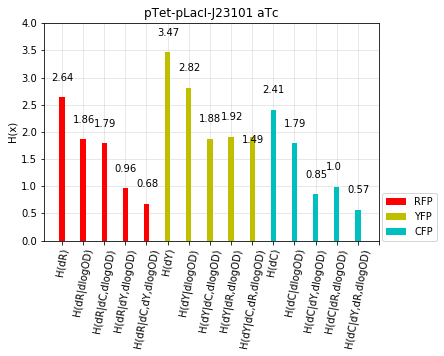

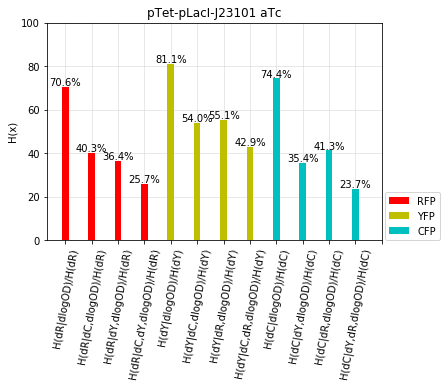

In [31]:
X = np.arange(16)
plt.figure()
plt.title('pTet-pLacI-J23101 aTc')
plt.ylabel('H(x)')
plt.ylim(ymax = 4)
plt.bar(X[0],valores2[0],color='r',width=0.25,label='RFP',zorder=3)
plt.bar(X[1],valores2[1],color='r',width=0.25,zorder=3)
plt.bar(X[2],valores2[2],color='r',width=0.25,zorder=3)
plt.bar(X[3],valores2[3],color='r',width=0.25,zorder=3)
plt.bar(X[4],valores2[4],color='r',width=0.25,zorder=3)
plt.bar(X[5],valores2[5],color='y',width=0.25,label='YFP',zorder=3)
plt.bar(X[6],valores2[6],color='y',width=0.25,zorder=3)
plt.bar(X[7],valores2[7],color='y',width=0.25,zorder=3)
plt.bar(X[8],valores2[8],color='y',width=0.25,zorder=3)
plt.bar(X[9],valores2[8],color='y',width=0.25,zorder=3)
plt.bar(X[10],valores2[10],color='c',width=0.25,label='CFP',zorder=3)
plt.bar(X[11],valores2[11],color='c',width=0.25,zorder=3)
plt.bar(X[12],valores2[12],color='c',width=0.25,zorder=3)
plt.bar(X[13],valores2[13],color='c',width=0.25,zorder=3)
plt.bar(X[14],valores2[14],color='c',width=0.25,zorder=3)
plt.xticks(X, ['H(dR)',"H(dR|dlogOD)",'H(dR|dC,dlogOD)','H(dR|dY,dlogOD)',"H(dR|dC,dY,dlogOD)",'H(dY)',"H(dY|dlogOD)",'H(dY|dC,dlogOD)','H(dY|dR,dlogOD)','H(dY|dC,dR,dlogOD)','H(dC)','H(dC|dlogOD)','H(dC|dY,dlogOD)','H(dC|dR,dlogOD)','H(dC|dY,dR,dlogOD)'],rotation=80)
plt.grid(color='lightgray', linestyle='-', linewidth=0.5,zorder=0)
for a,b in zip(X,valores2):
    plt.text(a-0.5,b+0.3,str(np.round(b,2)),fontsize=10.0, color='k')
plt.legend(loc=(1.01,0.0))
plt.savefig(fname='h pTet-pLacI aTc.png',dpi=1200,facecolor='w',edgecolor='w',bbox_inches='tight',pad_inches=0.2)

X = np.arange(13)
plt.figure()
plt.title('pTet-pLacI-J23101 aTc')
plt.ylabel('H(x)')
plt.ylim(ymax = 100)
plt.bar(X[0],porcentajes2[0],color='r',width=0.25,label='RFP',zorder=3)
plt.bar(X[1],porcentajes2[1],color='r',width=0.25,zorder=3)
plt.bar(X[2],porcentajes2[2],color='r',width=0.25,zorder=3)
plt.bar(X[3],porcentajes2[3],color='r',width=0.25,zorder=3)
plt.bar(X[4],porcentajes2[4],color='y',width=0.25,label='YFP',zorder=3)
plt.bar(X[5],porcentajes2[5],color='y',width=0.25,zorder=3)
plt.bar(X[6],porcentajes2[6],color='y',width=0.25,zorder=3)
plt.bar(X[7],porcentajes2[7],color='y',width=0.25,zorder=3)
plt.bar(X[8],porcentajes2[8],color='c',width=0.25,label='CFP',zorder=3)
plt.bar(X[9],porcentajes2[9],color='c',width=0.25,zorder=3)
plt.bar(X[10],porcentajes2[10],color='c',width=0.25,zorder=3)
plt.bar(X[11],porcentajes2[11],color='c',width=0.25,zorder=3)
plt.xticks(X, ["H(dR|dlogOD)/H(dR)",'H(dR|dC,dlogOD)/H(dR)','H(dR|dY,dlogOD)/H(dR)',"H(dR|dC,dY,dlogOD)/H(dR)","H(dY|dlogOD)/H(dY)",'H(dY|dC,dlogOD)/H(dY)','H(dY|dR,dlogOD)/H(dY)','H(dY|dC,dR,dlogOD)/H(dY)','H(dC|dlogOD)/H(dC)','H(dC|dY,dlogOD)/H(dC)','H(dC|dR,dlogOD)/H(dC)','H(dC|dY,dR,dlogOD)/H(dC)'],rotation=80)
plt.grid(color='lightgray', linestyle='-', linewidth=0.5,zorder=0)
for a,b in zip(X,porcentajes2):
    plt.text(a-0.60,b+0.6,str(np.round(b,1))+'%',fontsize=10.0, color='k')
plt.legend(loc=(1.01,0.0))
plt.savefig(fname='porcentajes h pTet-pLacI aTc.png',dpi=1200,facecolor='w',edgecolor='w',bbox_inches='tight',pad_inches=0.2)


In [37]:
print "J23106-pLacI-J23101 IPTG"
print "---"
print "H(dY) = ", entropy(prob_density(dy3))
print "H(dC) = ", entropy(prob_density(dc3))
print "H(dR) = ", entropy(prob_density(dr3))
print "H(dlogOD) = ", entropy(prob_density(do3))

print "---"
print "H(dY|dlogOD) = ", conditional_entropy(prob_density2d(do3,dy3))
print "H(dC|dlogOD) = ", conditional_entropy(prob_density2d(do3,dc3))
print "H(dR|dlogOD) = ", conditional_entropy(prob_density2d(do3,dr3))
print "H(dY|dC) = ", conditional_entropy(prob_density2d(dc3,dy3))
print "H(dY|dR) = ", conditional_entropy(prob_density2d(dr3,dy3))
print "H(dR|dC) = ", conditional_entropy(prob_density2d(dc3,dr3))
print "H(dR|dY) = ", conditional_entropy(prob_density2d(dy3,dr3))
print "H(dC|dY) = ", conditional_entropy(prob_density2d(dy3,dc3))
print "H(dC|dR) = ", conditional_entropy(prob_density2d(dr3,dc3))

print "---"
print "I(dlogOD,dC) = ", mutual_information(prob_density2d(do3,dc3))
print "I(dlogOD,dY) = ", mutual_information(prob_density2d(do3,dy3))
print "I(dlogOD,dR) = ", mutual_information(prob_density2d(do3,dr3))
print "I(dY,dC) = ", mutual_information(prob_density2d(dc3,dy3))
print "I(dY,dR) = ", mutual_information(prob_density2d(dr3,dy3))
print "I(dR,dC) = ", mutual_information(prob_density2d(dc3,dr3))


print "---"
print "H(dY|dC,dlogOD) = ", conditional_entropy(prob_density3d(dc3,dy3,do3))
print "H(dY|dR,dlogOD) = ", conditional_entropy(prob_density3d(dr3,dy3,do3))
print "H(dY|dC,dR) = ", conditional_entropy(prob_density3d(dc3,dy3,dr3))
print "H(dY|dC,dR,dlogOD) = ", conditional_entropy(prob_density4d(dc3,dy3,dr3,do3))
print "H(dR|dC,dlogOD) = ", conditional_entropy(prob_density3d(dc3,dr3,do3))
print "H(dR|dY,dlogOD) = ", conditional_entropy(prob_density3d(dy3,dr3,do3))
print "H(dR|dC,dY) = ", conditional_entropy(prob_density3d(dc3,dr3,dy3))
print "H(dR|dC,dY,dlogOD) = ", conditional_entropy(prob_density4d(dc3,dr3,dy3,do3))
print "H(dC|dY,dlogOD) = ", conditional_entropy(prob_density3d(dy3,dc3,do3))
print "H(dC|dR,dlogOD) = ", conditional_entropy(prob_density3d(dr3,dc3,do3))
print "H(dC|dY,dR) = ", conditional_entropy(prob_density3d(dy3,dc3,dr3))
print "H(dC|dY,dR,dlogOD) = ", conditional_entropy(prob_density4d(dy3,dc3,dr3,do3))

print "---"
print "H(dY|dC,dR,dlogOD) / H(dY) = ", conditional_entropy(prob_density4d(dc3,dy3,dr3,do3))/entropy(prob_density(dy3))
print "H(dY|dC,dlogOD) / H(dY) = ", conditional_entropy(prob_density3d(dc3,dy3,do3))/entropy(prob_density(dy3))
print "H(dY|dR,dlogOD) / H(dY) = ", conditional_entropy(prob_density3d(dr3,dy3,do3))/entropy(prob_density(dy3))
print "H(dY|dlogOD) / H(dY) = ", conditional_entropy(prob_density2d(do3,dy3))/entropy(prob_density(dy3))
print "H(dR|dC,dY,dlogOD) / H(dR) = ", conditional_entropy(prob_density4d(dc3,dr3,dy3,do3))/entropy(prob_density(dr3))
print "H(dR|dC,dlogOD) / H(dR) = ", conditional_entropy(prob_density3d(dc3,dr3,do3))/entropy(prob_density(dr3))
print "H(dR|dY,dlogOD) / H(dR) = ", conditional_entropy(prob_density3d(dy3,dr3,do3))/entropy(prob_density(dr3))
print "H(dR|dlogOD) / H(dR) = ", conditional_entropy(prob_density2d(do3,dr3))/entropy(prob_density(dr3))
print "H(dC|dR,dY,dlogOD) / H(dC) = ", conditional_entropy(prob_density4d(dr3,dc3,dy3,do3))/entropy(prob_density(dc3))
print "H(dC|dR,dlogOD) / H(dC) = ", conditional_entropy(prob_density3d(dr3,dc3,do3))/entropy(prob_density(dr3))
print "H(dC|dY,dlogOD) / H(dC) = ", conditional_entropy(prob_density3d(dy3,dc3,do3))/entropy(prob_density(dr3))
print "H(dC|dlogOD) / H(dC) = ", conditional_entropy(prob_density2d(do3,dc3))/entropy(prob_density(dr3))


print "H(dY|dC)/ H(dY) = ", conditional_entropy(prob_density2d(dc3,dy3))/entropy(prob_density(dy3))
print "H(dY|dR)/ H(dY) = ", conditional_entropy(prob_density2d(dr3,dy3))/entropy(prob_density(dy3))
print "H(dR|dC)/ H(dR) = ", conditional_entropy(prob_density2d(dc3,dr3))/entropy(prob_density(dr3))
print "H(dR|dY)/ H(dR) = ", conditional_entropy(prob_density2d(dy3,dr3))/entropy(prob_density(dr3))
print "H(dC|dY)/ H(dC) = ", conditional_entropy(prob_density2d(dy3,dc3))/entropy(prob_density(dc3))
print "H(dC|dR)/ H(dC) = ", conditional_entropy(prob_density2d(dr3,dc3))/entropy(prob_density(dc3))

J23106-pLacI-J23101 IPTG
---
H(dY) =  2.32051
H(dC) =  2.49967
H(dR) =  2.97392
H(dlogOD) =  4.00944
---
H(dY|dlogOD) =  1.97232
H(dC|dlogOD) =  1.9934
H(dR|dlogOD) =  2.31694
H(dY|dC) =  1.9113
H(dY|dR) =  1.81857
H(dR|dC) =  1.81941
H(dR|dY) =  2.47198
H(dC|dY) =  2.09046
H(dC|dR) =  1.34515
---
I(dlogOD,dC) =  0.506265
I(dlogOD,dY) =  0.348188
I(dlogOD,dR) =  0.656981
I(dY,dC) =  0.409207
I(dY,dR) =  0.501946
I(dR,dC) =  1.15451
---
H(dY|dC,dlogOD) =  1.41266
H(dY|dR,dlogOD) =  1.28621
H(dY|dC,dR) =  1.56612
H(dY|dC,dR,dlogOD) =  0.972827
H(dR|dC,dlogOD) =  1.33806
H(dR|dY,dlogOD) =  1.63082
H(dR|dC,dY) =  1.47423
H(dR|dC,dY,dlogOD) =  0.898224
H(dC|dY,dlogOD) =  1.43374
H(dC|dR,dlogOD) =  1.01452
H(dC|dY,dR) =  1.09271
H(dC|dY,dR,dlogOD) =  0.701143
---
H(dY|dC,dR,dlogOD) / H(dY) =  0.419229
H(dY|dC,dlogOD) / H(dY) =  0.608772
H(dY|dR,dlogOD) / H(dY) =  0.554277
H(dY|dlogOD) / H(dY) =  0.849952
H(dR|dC,dY,dlogOD) / H(dR) =  0.302034
H(dR|dC,dlogOD) / H(dR) =  0.449931
H(dR|dY,dlogO

In [34]:
#Porcentajes respecto a entropía inicial
hc3=entropy(prob_density(dc3))#H(dC)
ho3=entropy(prob_density(do3))#H(dlogOD)
hyo3=conditional_entropy(prob_density2d(do3,dy3))#H(dY|dlogOD)
hco3=conditional_entropy(prob_density2d(do3,dc3))#H(dC|dlogOD)
hro3=conditional_entropy(prob_density2d(do3,dr3))#H(dR|dlogOD)

hy3=entropy(prob_density(dy3))#H(dY)
hyc3=conditional_entropy(prob_density2d(dc3,dy3))#H(dY|dC)
hyr3=conditional_entropy(prob_density2d(dr3,dy3))#H(dY|dR)
hyco3=conditional_entropy(prob_density3d(dc3,dy3,do3))#H(dY|dC,dlogOD)
hyro3=conditional_entropy(prob_density3d(dr3,dy3,do3))#H(dY|dR,dlogOD)
hycr3= conditional_entropy(prob_density3d(dc3,dy3,dr3))#H(dY|dC,dR) 
hycro3=conditional_entropy(prob_density4d(dc3,dy3,dr3,do3))#H(dY|dC,dR,dlogOD)

hr3=entropy(prob_density(dr3))#H(dR)
hrc3= conditional_entropy(prob_density2d(dc3,dr3))#H(dR|dC)
hry3=conditional_entropy(prob_density2d(dy3,dr3))#H(dR|dY)
hrco3=conditional_entropy(prob_density3d(dc3,dr3,do3))#H(dR|dC,dlogOD)
hryo3=conditional_entropy(prob_density3d(dy3,dr3,do3))#H(dR|dY,dlogOD)
hrcy3= conditional_entropy(prob_density3d(dc3,dr3,dy3))#H(dR|dC,dY)
hrcyo3=conditional_entropy(prob_density4d(dc3,dr3,dy3,do3))#H(dR|dC,dY,dlogOD)

hc3=entropy(prob_density(dc3))#H(dC)
hcy3=conditional_entropy(prob_density2d(dy3,dc3))#H(dC|dY)
hcr3=conditional_entropy(prob_density2d(dr3,dc3))#H(dC|dR)
hcyo3=conditional_entropy(prob_density3d(dy3,dc3,do3))#H(dC|dY,dlogOD)
hcro3=conditional_entropy(prob_density3d(dr3,dc3,do3))#H(dC|dR,dlogOD)
hcyr3=conditional_entropy(prob_density3d(dy3,dc3,dr3))#H(dC|dY,dR)
hcyro3=conditional_entropy(prob_density4d(dy3,dc3,dr3,do3))#H(dC|dY,dR,dlogOD)


soloh3=[hr3,hy3,hc3,ho3]
hod3=[hr3,hro3,hy3,hyo3,hc3,hco3]
soloy3=[hy3,hyc3,hyr3,hyo3,hyco3,hyro3,hycr3,hycro3]
solor3=[hr3,hrc3,hry3,hro3,hrco3,hryo3,hrcy3,hrcyo3]
soloc3=[hc3,hcy3,hcr3,hco3,hcyo3,hcro3,hcyr3,hycro3]

In [35]:
A3=(hro3/hr3)*100
B3=(hrco3/hr3)*100
C3=(hryo3/hr3)*100
D3=(hrcyo3/hr3)*100
E3=(hyo3/hy3)*100
F3=(hyco3/hy3)*100
G3=(hyro3/hy3)*100
H3=(hycro3/hy3)*100
I3=(hco3/hc3)*100
J3=(hcyo3/hc3)*100
K3=(hcro3/hc3)*100
L3=(hcyro3/hc3)*100

valores3=[hr3,hro3,hco3,hryo3,hrcyo3,hy3,hyo3,hyco3,hyro3,hycro3,hc3,hco3,hcyo3,hcro3,hcyro3]
porcentajes3=[A3,B3,C3,D3,E3,F3,G3,H3,I3,J3,K3,L3]
print valores3
print porcentajes3

[2.9739225, 2.3169417, 1.9934011, 1.6308241, 0.89822435, 2.3205118, 1.9723244, 1.4126635, 1.2862062, 0.97282696, 2.4996657, 1.9934011, 1.4337416, 1.0145211, 0.70114279]
[77.908611297607422, 44.993099570274353, 54.837477207183838, 30.203354358673096, 84.995228052139282, 60.877233743667603, 55.427694320678711, 41.922947764396667, 79.746705293655396, 57.357329130172729, 40.58627188205719, 28.049463033676147]


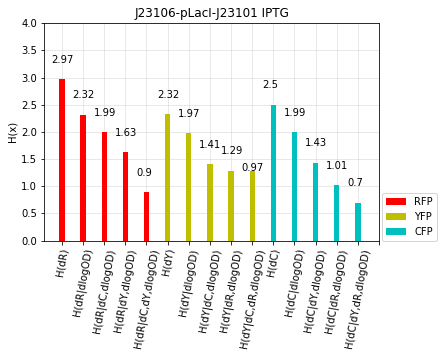

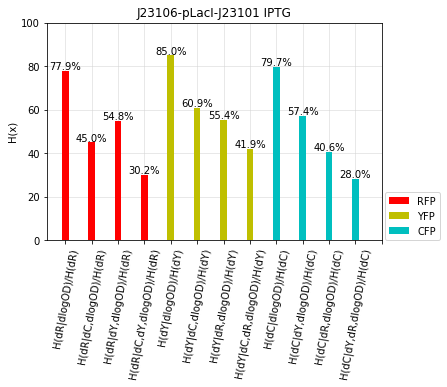

In [36]:
X = np.arange(16)
plt.figure()
plt.title('J23106-pLacI-J23101 IPTG')
plt.ylabel('H(x)')
plt.ylim(ymax = 4)
plt.bar(X[0],valores3[0],color='r',width=0.25,label='RFP',zorder=3)
plt.bar(X[1],valores3[1],color='r',width=0.25,zorder=3)
plt.bar(X[2],valores3[2],color='r',width=0.25,zorder=3)
plt.bar(X[3],valores3[3],color='r',width=0.25,zorder=3)
plt.bar(X[4],valores3[4],color='r',width=0.25,zorder=3)
plt.bar(X[5],valores3[5],color='y',width=0.25,label='YFP',zorder=3)
plt.bar(X[6],valores3[6],color='y',width=0.25,zorder=3)
plt.bar(X[7],valores3[7],color='y',width=0.25,zorder=3)
plt.bar(X[8],valores3[8],color='y',width=0.25,zorder=3)
plt.bar(X[9],valores3[8],color='y',width=0.25,zorder=3)
plt.bar(X[10],valores3[10],color='c',width=0.25,label='CFP',zorder=3)
plt.bar(X[11],valores3[11],color='c',width=0.25,zorder=3)
plt.bar(X[12],valores3[12],color='c',width=0.25,zorder=3)
plt.bar(X[13],valores3[13],color='c',width=0.25,zorder=3)
plt.bar(X[14],valores3[14],color='c',width=0.25,zorder=3)
plt.xticks(X, ['H(dR)',"H(dR|dlogOD)",'H(dR|dC,dlogOD)','H(dR|dY,dlogOD)',"H(dR|dC,dY,dlogOD)",'H(dY)',"H(dY|dlogOD)",'H(dY|dC,dlogOD)','H(dY|dR,dlogOD)','H(dY|dC,dR,dlogOD)','H(dC)','H(dC|dlogOD)','H(dC|dY,dlogOD)','H(dC|dR,dlogOD)','H(dC|dY,dR,dlogOD)'],rotation=80)
plt.grid(color='lightgray', linestyle='-', linewidth=0.5,zorder=0)
for a,b in zip(X,valores3):
    plt.text(a-0.5,b+0.3,str(np.round(b,2)),fontsize=10.0, color='k')
plt.legend(loc=(1.01,0.0))
plt.savefig(fname='h J23106-pLacI iptg.png',dpi=1200,facecolor='w',edgecolor='w',bbox_inches='tight',pad_inches=0.2)

X = np.arange(13)
plt.figure()
plt.title('J23106-pLacI-J23101 IPTG')
plt.ylabel('H(x)')
plt.ylim(ymax = 100)
plt.bar(X[0],porcentajes3[0],color='r',width=0.25,label='RFP',zorder=3)
plt.bar(X[1],porcentajes3[1],color='r',width=0.25,zorder=3)
plt.bar(X[2],porcentajes3[2],color='r',width=0.25,zorder=3)
plt.bar(X[3],porcentajes3[3],color='r',width=0.25,zorder=3)
plt.bar(X[4],porcentajes3[4],color='y',width=0.25,label='YFP',zorder=3)
plt.bar(X[5],porcentajes3[5],color='y',width=0.25,zorder=3)
plt.bar(X[6],porcentajes3[6],color='y',width=0.25,zorder=3)
plt.bar(X[7],porcentajes3[7],color='y',width=0.25,zorder=3)
plt.bar(X[8],porcentajes3[8],color='c',width=0.25,label='CFP',zorder=3)
plt.bar(X[9],porcentajes3[9],color='c',width=0.25,zorder=3)
plt.bar(X[10],porcentajes3[10],color='c',width=0.25,zorder=3)
plt.bar(X[11],porcentajes3[11],color='c',width=0.25,zorder=3)
plt.xticks(X, ["H(dR|dlogOD)/H(dR)",'H(dR|dC,dlogOD)/H(dR)','H(dR|dY,dlogOD)/H(dR)',"H(dR|dC,dY,dlogOD)/H(dR)","H(dY|dlogOD)/H(dY)",'H(dY|dC,dlogOD)/H(dY)','H(dY|dR,dlogOD)/H(dY)','H(dY|dC,dR,dlogOD)/H(dY)','H(dC|dlogOD)/H(dC)','H(dC|dY,dlogOD)/H(dC)','H(dC|dR,dlogOD)/H(dC)','H(dC|dY,dR,dlogOD)/H(dC)'],rotation=80)
plt.grid(color='lightgray', linestyle='-', linewidth=0.5,zorder=0)
for a,b in zip(X,porcentajes3):
    plt.text(a-0.60,b+0.6,str(np.round(b,1))+'%',fontsize=10.0, color='k')
plt.legend(loc=(1.01,0.0))
plt.savefig(fname='porcentajes h J23106-pLacI iptg.png',dpi=1200,facecolor='w',edgecolor='w',bbox_inches='tight',pad_inches=0.2)


In [38]:
print "pTet-pLacI-J23101 IPTG"
print "---"
print "H(dY) = ", entropy(prob_density(dy4))
print "H(dC) = ", entropy(prob_density(dc4))
print "H(dR) = ", entropy(prob_density(dr4))
print "H(dlogOD) = ", entropy(prob_density(do4))

print "---"
print "H(dY|dlogOD) = ", conditional_entropy(prob_density2d(do4,dy4))
print "H(dC|dlogOD) = ", conditional_entropy(prob_density2d(do4,dc4))
print "H(dR|dlogOD) = ", conditional_entropy(prob_density2d(do4,dr4))
print "H(dY|dC) = ", conditional_entropy(prob_density2d(dc4,dy4))
print "H(dY|dR) = ", conditional_entropy(prob_density2d(dr4,dy4))
print "H(dR|dC) = ", conditional_entropy(prob_density2d(dc4,dr4))
print "H(dR|dY) = ", conditional_entropy(prob_density2d(dy4,dr4))
print "H(dC|dY) = ", conditional_entropy(prob_density2d(dy4,dc4))
print "H(dC|dR) = ", conditional_entropy(prob_density2d(dr4,dc4))

print "---"
print "I(dlogOD,dC) = ", mutual_information(prob_density2d(do4,dc4))
print "I(dlogOD,dY) = ", mutual_information(prob_density2d(do4,dy4))
print "I(dlogOD,dR) = ", mutual_information(prob_density2d(do4,dr4))
print "I(dY,dC) = ", mutual_information(prob_density2d(dc4,dy4))
print "I(dY,dR) = ", mutual_information(prob_density2d(dr4,dy4))
print "I(dR,dC) = ", mutual_information(prob_density2d(dc4,dr4))


print "---"
print "H(dY|dC,dlogOD) = ", conditional_entropy(prob_density3d(dc4,dy4,do4))
print "H(dY|dR,dlogOD) = ", conditional_entropy(prob_density3d(dr4,dy4,do4))
print "H(dY|dC,dR) = ", conditional_entropy(prob_density3d(dc4,dy4,dr4))
print "H(dY|dC,dR,dlogOD) = ", conditional_entropy(prob_density4d(dc4,dy4,dr4,do4))
print "H(dR|dC,dlogOD) = ", conditional_entropy(prob_density3d(dc4,dr4,do4))
print "H(dR|dY,dlogOD) = ", conditional_entropy(prob_density3d(dy4,dr4,do4))
print "H(dR|dC,dY) = ", conditional_entropy(prob_density3d(dc4,dr4,dy4))
print "H(dR|dC,dY,dlogOD) = ", conditional_entropy(prob_density4d(dc4,dr4,dy4,do4))
print "H(dC|dY,dlogOD) = ", conditional_entropy(prob_density3d(dy4,dc4,do4))
print "H(dC|dR,dlogOD) = ", conditional_entropy(prob_density3d(dr4,dc4,do4))
print "H(dC|dY,dR) = ", conditional_entropy(prob_density3d(dy4,dc4,dr4))
print "H(dC|dY,dR,dlogOD) = ", conditional_entropy(prob_density4d(dy4,dc4,dr4,do4))

print "---"
print "H(dY|dC,dR,dlogOD) / H(dY) = ", conditional_entropy(prob_density4d(dc4,dy4,dr4,do4))/entropy(prob_density(dy4))
print "H(dY|dC,dlogOD) / H(dY) = ", conditional_entropy(prob_density3d(dc4,dy4,do4))/entropy(prob_density(dy4))
print "H(dY|dR,dlogOD) / H(dY) = ", conditional_entropy(prob_density3d(dr4,dy4,do4))/entropy(prob_density(dy4))
print "H(dY|dlogOD) / H(dY) = ", conditional_entropy(prob_density2d(do4,dy4))/entropy(prob_density(dy4))
print "H(dR|dC,dY,dlogOD) / H(dR) = ", conditional_entropy(prob_density4d(dc4,dr4,dy4,do4))/entropy(prob_density(dr4))
print "H(dR|dC,dlogOD) / H(dR) = ", conditional_entropy(prob_density3d(dc4,dr4,do4))/entropy(prob_density(dr4))
print "H(dR|dY,dlogOD) / H(dR) = ", conditional_entropy(prob_density3d(dy4,dr4,do4))/entropy(prob_density(dr4))
print "H(dR|dlogOD) / H(dR) = ", conditional_entropy(prob_density2d(do4,dr4))/entropy(prob_density(dr4))
print "H(dC|dR,dY,dlogOD) / H(dC) = ", conditional_entropy(prob_density4d(dr4,dc4,dy4,do4))/entropy(prob_density(dc4))
print "H(dC|dR,dlogOD) / H(dC) = ", conditional_entropy(prob_density3d(dr4,dc4,do4))/entropy(prob_density(dr4))
print "H(dC|dY,dlogOD) / H(dC) = ", conditional_entropy(prob_density3d(dy4,dc4,do4))/entropy(prob_density(dr4))
print "H(dC|dlogOD) / H(dC) = ", conditional_entropy(prob_density2d(do4,dc4))/entropy(prob_density(dr4))


print "H(dY|dC)/ H(dY) = ", conditional_entropy(prob_density2d(dc4,dy4))/entropy(prob_density(dy4))
print "H(dY|dR)/ H(dY) = ", conditional_entropy(prob_density2d(dr4,dy4))/entropy(prob_density(dy4))
print "H(dR|dC)/ H(dR) = ", conditional_entropy(prob_density2d(dc4,dr4))/entropy(prob_density(dr4))
print "H(dR|dY)/ H(dR) = ", conditional_entropy(prob_density2d(dy4,dr4))/entropy(prob_density(dr4))
print "H(dC|dY)/ H(dC) = ", conditional_entropy(prob_density2d(dy4,dc4))/entropy(prob_density(dc4))
print "H(dC|dR)/ H(dC) = ", conditional_entropy(prob_density2d(dr4,dc4))/entropy(prob_density(dc4))

pTet-pLacI-J23101 IPTG
---
H(dY) =  2.47855
H(dC) =  2.45379
H(dR) =  2.9112
H(dlogOD) =  4.11667
---
H(dY|dlogOD) =  2.1007
H(dC|dlogOD) =  2.00155
H(dR|dlogOD) =  2.33484
H(dY|dC) =  2.04834
H(dY|dR) =  1.92555
H(dR|dC) =  1.9785
H(dR|dY) =  2.3582
H(dC|dY) =  2.02358
H(dC|dR) =  1.52108
---
I(dlogOD,dC) =  0.452238
I(dlogOD,dY) =  0.37785
I(dlogOD,dR) =  0.576361
I(dY,dC) =  0.430213
I(dY,dR) =  0.553006
I(dR,dC) =  0.932707
---
H(dY|dC,dlogOD) =  1.49939
H(dY|dR,dlogOD) =  1.36466
H(dY|dC,dR) =  1.62756
H(dY|dC,dR,dlogOD) =  1.01843
H(dR|dC,dlogOD) =  1.41672
H(dR|dY,dlogOD) =  1.5988
H(dR|dC,dY) =  1.55771
H(dR|dC,dY,dlogOD) =  0.935757
H(dC|dY,dlogOD) =  1.40024
H(dC|dR,dlogOD) =  1.08343
H(dC|dY,dR) =  1.22309
H(dC|dY,dR,dlogOD) =  0.737191
---
H(dY|dC,dR,dlogOD) / H(dY) =  0.410895
H(dY|dC,dlogOD) / H(dY) =  0.604946
H(dY|dR,dlogOD) / H(dY) =  0.550589
H(dY|dlogOD) / H(dY) =  0.847552
H(dR|dC,dY,dlogOD) / H(dR) =  0.321433
H(dR|dC,dlogOD) / H(dR) =  0.486645
H(dR|dY,dlogOD) / H

In [39]:
#Porcentajes respecto a entropía inicial
hc4=entropy(prob_density(dc4))#H(dC)
ho4=entropy(prob_density(do4))#H(dlogOD)
hyo4=conditional_entropy(prob_density2d(do4,dy4))#H(dY|dlogOD)
hco4=conditional_entropy(prob_density2d(do4,dc4))#H(dC|dlogOD)
hro4=conditional_entropy(prob_density2d(do4,dr4))#H(dR|dlogOD)

hy4=entropy(prob_density(dy4))#H(dY)
hyc4=conditional_entropy(prob_density2d(dc4,dy4))#H(dY|dC)
hyr4=conditional_entropy(prob_density2d(dr4,dy4))#H(dY|dR)
hyco4=conditional_entropy(prob_density3d(dc4,dy4,do4))#H(dY|dC,dlogOD)
hyro4=conditional_entropy(prob_density3d(dr4,dy4,do4))#H(dY|dR,dlogOD)
hycr4= conditional_entropy(prob_density3d(dc4,dy4,dr4))#H(dY|dC,dR) 
hycro4=conditional_entropy(prob_density4d(dc4,dy4,dr4,do4))#H(dY|dC,dR,dlogOD)

hr4=entropy(prob_density(dr4))#H(dR)
hrc4= conditional_entropy(prob_density2d(dc4,dr4))#H(dR|dC)
hry4=conditional_entropy(prob_density2d(dy4,dr4))#H(dR|dY)
hrco4=conditional_entropy(prob_density3d(dc4,dr4,do4))#H(dR|dC,dlogOD)
hryo4=conditional_entropy(prob_density3d(dy4,dr4,do4))#H(dR|dY,dlogOD)
hrcy4= conditional_entropy(prob_density3d(dc4,dr4,dy4))#H(dR|dC,dY)
hrcyo4=conditional_entropy(prob_density4d(dc4,dr4,dy4,do4))#H(dR|dC,dY,dlogOD)

hc4=entropy(prob_density(dc4))#H(dC)
hcy4=conditional_entropy(prob_density2d(dy4,dc4))#H(dC|dY)
hcr4=conditional_entropy(prob_density2d(dr4,dc4))#H(dC|dR)
hcyo4=conditional_entropy(prob_density3d(dy4,dc4,do4))#H(dC|dY,dlogOD)
hcro4=conditional_entropy(prob_density3d(dr4,dc4,do4))#H(dC|dR,dlogOD)
hcyr4=conditional_entropy(prob_density3d(dy4,dc4,dr4))#H(dC|dY,dR)
hcyro4=conditional_entropy(prob_density4d(dy4,dc4,dr4,do4))#H(dC|dY,dR,dlogOD)


soloh4=[hr4,hy4,hc4,ho4]
hod4=[hr4,hro4,hy4,hyo4,hc4,hco4]
soloy4=[hy4,hyc4,hyr4,hyo4,hyco4,hyro4,hycr4,hycro4]
solor4=[hr4,hrc4,hry4,hro4,hrco4,hryo4,hrcy4,hrcyo4]
soloc4=[hc4,hcy4,hcr4,hco4,hcyo4,hcro4,hcyr4,hycro4]

In [41]:
A4=(hro4/hr4)*100
B4=(hrco4/hr4)*100
C4=(hryo4/hr4)*100
D4=(hrcyo4/hr4)*100
E4=(hyo4/hy4)*100
F4=(hyco4/hy4)*100
G4=(hyro4/hy4)*100
H4=(hycro4/hy4)*100
I4=(hco4/hc4)*100
J4=(hcyo4/hc4)*100
K4=(hcro4/hc4)*100
L4=(hcyro4/hc4)*100

valores4=[hr4,hro4,hco4,hryo4,hrcyo4,hy4,hyo4,hyco4,hyro4,hycro4,hc4,hco4,hcyo4,hcro4,hcyro4]
porcentajes4=[A4,B4,C4,D4,E4,F4,G4,H4,I4,J4,K4,L4]
print valores4
print porcentajes4

[2.9112022, 2.3348417, 2.0015516, 1.5988035, 0.93575668, 2.4785535, 2.1007032, 1.4993901, 1.3646636, 1.0184255, 2.4537899, 2.0015516, 1.400238, 1.0834298, 0.7371912]
[80.201977491378784, 48.664477467536926, 54.919010400772095, 32.143306732177734, 84.755212068557739, 60.49456000328064, 55.058872699737549, 41.089507937431335, 81.569802761077881, 57.064300775527954, 44.153323769569397, 30.042964220046997]


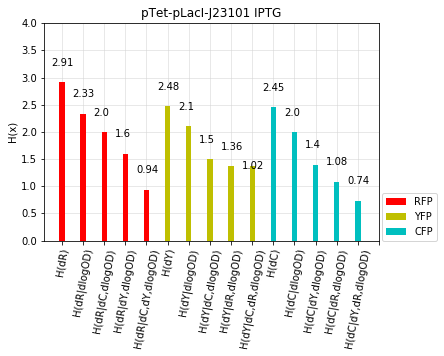

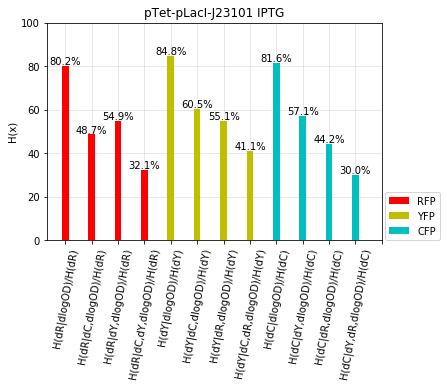

In [42]:
X = np.arange(16)
plt.figure()
plt.title('pTet-pLacI-J23101 IPTG')
plt.ylabel('H(x)')
plt.ylim(ymax = 4)
plt.bar(X[0],valores4[0],color='r',width=0.25,label='RFP',zorder=3)
plt.bar(X[1],valores4[1],color='r',width=0.25,zorder=3)
plt.bar(X[2],valores4[2],color='r',width=0.25,zorder=3)
plt.bar(X[3],valores4[3],color='r',width=0.25,zorder=3)
plt.bar(X[4],valores4[4],color='r',width=0.25,zorder=3)
plt.bar(X[5],valores4[5],color='y',width=0.25,label='YFP',zorder=3)
plt.bar(X[6],valores4[6],color='y',width=0.25,zorder=3)
plt.bar(X[7],valores4[7],color='y',width=0.25,zorder=3)
plt.bar(X[8],valores4[8],color='y',width=0.25,zorder=3)
plt.bar(X[9],valores4[8],color='y',width=0.25,zorder=3)
plt.bar(X[10],valores4[10],color='c',width=0.25,label='CFP',zorder=3)
plt.bar(X[11],valores4[11],color='c',width=0.25,zorder=3)
plt.bar(X[12],valores4[12],color='c',width=0.25,zorder=3)
plt.bar(X[13],valores4[13],color='c',width=0.25,zorder=3)
plt.bar(X[14],valores4[14],color='c',width=0.25,zorder=3)
plt.xticks(X, ['H(dR)',"H(dR|dlogOD)",'H(dR|dC,dlogOD)','H(dR|dY,dlogOD)',"H(dR|dC,dY,dlogOD)",'H(dY)',"H(dY|dlogOD)",'H(dY|dC,dlogOD)','H(dY|dR,dlogOD)','H(dY|dC,dR,dlogOD)','H(dC)','H(dC|dlogOD)','H(dC|dY,dlogOD)','H(dC|dR,dlogOD)','H(dC|dY,dR,dlogOD)'],rotation=80)
plt.grid(color='lightgray', linestyle='-', linewidth=0.5,zorder=0)
for a,b in zip(X,valores4):
    plt.text(a-0.5,b+0.3,str(np.round(b,2)),fontsize=10.0, color='k')
plt.legend(loc=(1.01,0.0))
plt.savefig(fname='h pTet-pLacI iptg.png',dpi=1200,facecolor='w',edgecolor='w',bbox_inches='tight',pad_inches=0.2)

X = np.arange(13)
plt.figure()
plt.title('pTet-pLacI-J23101 IPTG')
plt.ylabel('H(x)')
plt.ylim(ymax = 100)
plt.bar(X[0],porcentajes4[0],color='r',width=0.25,label='RFP',zorder=3)
plt.bar(X[1],porcentajes4[1],color='r',width=0.25,zorder=3)
plt.bar(X[2],porcentajes4[2],color='r',width=0.25,zorder=3)
plt.bar(X[3],porcentajes4[3],color='r',width=0.25,zorder=3)
plt.bar(X[4],porcentajes4[4],color='y',width=0.25,label='YFP',zorder=3)
plt.bar(X[5],porcentajes4[5],color='y',width=0.25,zorder=3)
plt.bar(X[6],porcentajes4[6],color='y',width=0.25,zorder=3)
plt.bar(X[7],porcentajes4[7],color='y',width=0.25,zorder=3)
plt.bar(X[8],porcentajes4[8],color='c',width=0.25,label='CFP',zorder=3)
plt.bar(X[9],porcentajes4[9],color='c',width=0.25,zorder=3)
plt.bar(X[10],porcentajes4[10],color='c',width=0.25,zorder=3)
plt.bar(X[11],porcentajes4[11],color='c',width=0.25,zorder=3)
plt.xticks(X, ["H(dR|dlogOD)/H(dR)",'H(dR|dC,dlogOD)/H(dR)','H(dR|dY,dlogOD)/H(dR)',"H(dR|dC,dY,dlogOD)/H(dR)","H(dY|dlogOD)/H(dY)",'H(dY|dC,dlogOD)/H(dY)','H(dY|dR,dlogOD)/H(dY)','H(dY|dC,dR,dlogOD)/H(dY)','H(dC|dlogOD)/H(dC)','H(dC|dY,dlogOD)/H(dC)','H(dC|dR,dlogOD)/H(dC)','H(dC|dY,dR,dlogOD)/H(dC)'],rotation=80)
plt.grid(color='lightgray', linestyle='-', linewidth=0.5,zorder=0)
for a,b in zip(X,porcentajes4):
    plt.text(a-0.60,b+0.6,str(np.round(b,1))+'%',fontsize=10.0, color='k')
plt.legend(loc=(1.01,0.0))
plt.savefig(fname='porcentajes h pTet-pLacI iptg.png',dpi=1200,facecolor='w',edgecolor='w',bbox_inches='tight',pad_inches=0.2)
